## Instalação e importação das bibliotecas

In [1]:
!pip install plotly==5.3.1
!pip install -U kaleido

import numpy as np
import pandas as pd
import plotly as pl
import plotly.graph_objects as go
import plotly.io as pio
import statsmodels.api as sm

pio.renderers.default = "png"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


## Dataframe

In [2]:
X = [ 1,   2,  3,  4,  5,  6,  7,  8,  9, 10]
Y = [30,  28, 24, 20, 18, 14, 13, 10,  7,  6]

df = pd.DataFrame(list(zip(X, Y)), columns = ['Meses','Erros'])

print (df)

   Meses  Erros
0      1     30
1      2     28
2      3     24
3      4     20
4      5     18
5      6     14
6      7     13
7      8     10
8      9      7
9     10      6


## Visualização

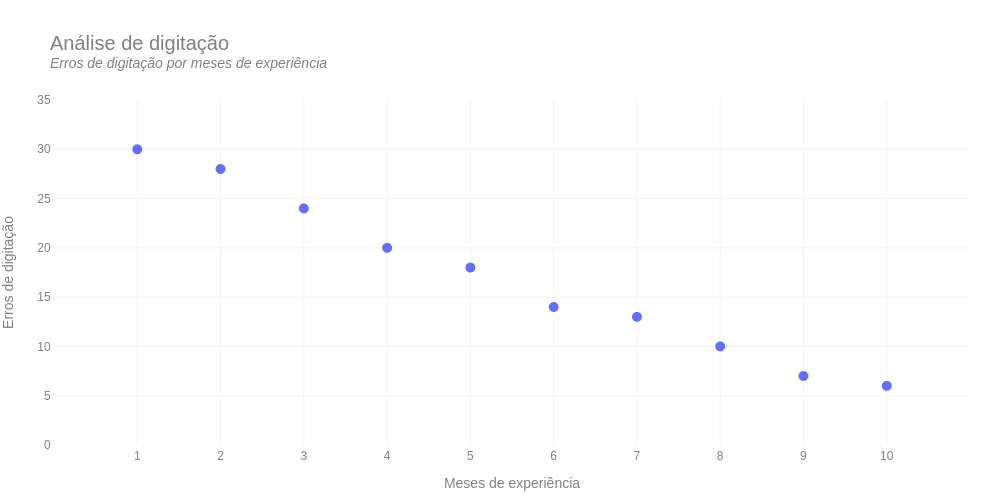

In [3]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x            = df['Meses'],
        y            = df['Erros'],
        mode         = 'markers',
        marker       = {'size': 10},
    )
)

fig.update_layout(
    title            = 'Análise de digitação<br><sup><i>Erros de digitação por meses de experiência</i></sup>',
    title_font_color = 'gray',
    title_font_size  = 20,
    width            = 1000,
    height           = 500,
    margin           = {'l': 30, 'r': 30, 't': 100, 'b': 30},
    plot_bgcolor     = 'white',
    font_color       = 'gray',
    xaxis1           = {
        'showline': True,
        'title': 'Meses de experiência',
        'showticklabels': True,
        'range': [0, 11],
        'tickmode': 'array',
        'tickvals': list(range(1, 11)),
        'gridcolor': 'whitesmoke'
    },
    yaxis1           = {
        'showline': True,
        'title': 'Erros de digitação',
        'showticklabels': True,
        'range': [0, 35],
        'gridcolor': 'whitesmoke'
    }
)

fig.show()

## Modelo de regressão linear (Ordinary Least Squares)

In [4]:
X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm)
results = model.fit()

In [5]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     608.9
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           7.77e-09
Time:                        18:04:58   Log-Likelihood:                -13.289
No. Observations:                  10   AIC:                             30.58
Df Residuals:                       8   BIC:                             31.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2667      0.698     46.229      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



In [6]:
results.predict([1, 5])

array([18.38787879])